In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
ROOT_DIR = Path("/home/pkoshkin/repo/finantial-tools")
import sys
sys.path.append(str(ROOT_DIR))
from src.buy_vs_rent import compute_finantial_model

In [2]:
CAPITAL = 100_000
MONTHLY_INCOME = 10_000
MONTHLY_RENT = 1_490
MONTHLY_SPENDING = 5_000
YEARLY_INCOME_INCREASE_RATE = 2 / 100
YEARLY_APARTMENT_RAISE_RATE = 3 / 100
YEARLY_RENT_INCREASE_RATE = 2 / 100
YEARLY_INFLATION_RATE = 2 / 100
YEARLY_ETF_RETURN_RATE = 7 / 100
MORTGAGE_APARTMENT_PRICE = 450_000
MORTGAGE_INTEREST_RATE = 3.8 / 100
MORTGAGE_DOWN_PAYMENT_RATE = 10 / 100
MORTGAGE_TOTAL_FEES_RATE = 10 / 100
MORTGAGE_YEARLY_REPAYMENT_RATE = 1.5 / 100
MORTGAGE_REFINANCING_YEARS = 10
YEARS = 30

buy_model = compute_finantial_model(
    yearly_inflation_rate=YEARLY_INFLATION_RATE,
    yearly_apartment_raise_rate=YEARLY_APARTMENT_RAISE_RATE,
    mortgage_apartment_price=MORTGAGE_APARTMENT_PRICE,
    mortgage_interest_rate=MORTGAGE_INTEREST_RATE,
    mortgage_down_payment_rate=MORTGAGE_DOWN_PAYMENT_RATE,
    mortgage_total_fees_rate=MORTGAGE_TOTAL_FEES_RATE,
    mortgage_yearly_repayment_rate=MORTGAGE_YEARLY_REPAYMENT_RATE,
    mortgate_refinancing_years=MORTGAGE_REFINANCING_YEARS,
    etf_yearly_return_rate=YEARLY_ETF_RETURN_RATE,
    cold_rent_monthly_cost=0,
    cold_rent_yearly_increase_rate=YEARLY_RENT_INCREASE_RATE,
    initial_capital=CAPITAL,
    monthly_net_income=MONTHLY_INCOME,
    monthly_spending=MONTHLY_SPENDING,
    yearly_income_increase_rate=YEARLY_INCOME_INCREASE_RATE,
    years=YEARS,
)

rent_model = compute_finantial_model(
    yearly_inflation_rate=YEARLY_INFLATION_RATE,
    yearly_apartment_raise_rate=YEARLY_APARTMENT_RAISE_RATE,
    mortgage_apartment_price=0,
    mortgage_interest_rate=MORTGAGE_INTEREST_RATE,
    mortgage_down_payment_rate=MORTGAGE_DOWN_PAYMENT_RATE,
    mortgage_total_fees_rate=MORTGAGE_TOTAL_FEES_RATE,
    mortgage_yearly_repayment_rate=MORTGAGE_YEARLY_REPAYMENT_RATE,
    mortgate_refinancing_years=MORTGAGE_REFINANCING_YEARS,
    etf_yearly_return_rate=YEARLY_ETF_RETURN_RATE,
    cold_rent_monthly_cost=MONTHLY_RENT,
    cold_rent_yearly_increase_rate=YEARLY_RENT_INCREASE_RATE,
    initial_capital=CAPITAL,
    monthly_net_income=MONTHLY_INCOME,
    monthly_spending=MONTHLY_SPENDING,
    yearly_income_increase_rate=YEARLY_INCOME_INCREASE_RATE,
    years=YEARS,
)

In [3]:
rent_model.head()

,year,total_loan,estimated_total_capital,monthly_interest_payment,monthly_loan_repayment,monthly_rent,monthly_apartment_spend,monthly_spending,monthly_income,monthly_leftover,invested_capital,property_value,property_equity
0,0,0.0,100000.000000,0.0,0.0,1490.00000,1490.00000,5000.0000,10000.00,3510.000000,100000.000000,0.0,0.0
1,1,0.0,149896.366879,0.0,0.0,1490.00000,1490.00000,5100.0000,10000.00,3418.409176,141571.966498,0.0,0.0
2,2,0.0,204143.406776,0.0,0.0,1519.80000,1519.80000,5202.0000,10200.00,3486.777360,183975.372326,0.0,0.0
3,3,0.0,263062.825351,0.0,0.0,1550.19600,1550.19600,5306.0400,10404.00,3556.512907,227226.846270,0.0,0.0
4,4,0.0,326999.190829,0.0,0.0,1581.19992,1581.19992,5412.1608,10612.08,3627.643165,271343.349694,0.0,0.0


In [4]:
buy_model.head()

,year,total_loan,estimated_total_capital,monthly_interest_payment,monthly_loan_repayment,monthly_rent,monthly_apartment_spend,monthly_spending,monthly_income,monthly_leftover,invested_capital,property_value,property_equity
0,0,0.0,100000.000000,0.0,0.00,0.0,0.00,5000.0000,10000.00,5000.000000,100000.000000,0.0000,0.0000
1,1,398925.0,114472.753106,1282.5,506.25,0.0,1788.75,5100.0000,10000.00,3119.659176,47986.966498,463500.0000,64575.0000
2,2,392850.0,178370.209123,1282.5,506.25,0.0,1788.75,5202.0000,10200.00,3217.827360,87162.972326,477405.0000,84555.0000
3,3,386775.0,247010.434457,1282.5,506.25,0.0,1788.75,5306.0400,10404.00,3317.958907,127551.798270,491727.1500,104952.1500
4,4,380700.0,320733.764908,1282.5,506.25,0.0,1788.75,5412.1608,10612.08,3420.093085,169177.700734,506478.9645,125778.9645


In [5]:
rent_model.tail()

,year,total_loan,estimated_total_capital,monthly_interest_payment,monthly_loan_repayment,monthly_rent,monthly_apartment_spend,monthly_spending,monthly_income,monthly_leftover,invested_capital,property_value,property_equity
26,26,0.0,4.127351e+06,0.0,0.0,2444.502932,2444.502932,8367.090572,16406.059945,5608.262586,1.499766e+06,0.0,0.0
27,27,0.0,4.488049e+06,0.0,0.0,2493.392990,2493.392990,8534.432383,16734.181144,5720.427838,1.569333e+06,0.0,0.0
28,28,0.0,4.875432e+06,0.0,0.0,2543.260850,2543.260850,8705.121031,17068.864766,5834.836394,1.640292e+06,0.0,0.0
29,29,0.0,5.291396e+06,0.0,0.0,2594.126067,2594.126067,8879.223451,17410.242062,5951.533122,1.712669e+06,0.0,0.0
30,30,0.0,5.737971e+06,0.0,0.0,2646.008589,2646.008589,9056.807921,17758.446903,6070.563785,1.786495e+06,0.0,0.0


In [6]:
buy_model.tail()

,year,total_loan,estimated_total_capital,monthly_interest_payment,monthly_loan_repayment,monthly_rent,monthly_apartment_spend,monthly_spending,monthly_income,monthly_leftover,invested_capital,property_value,property_equity
26,26,266277.3750,4.426000e+06,926.60625,365.765625,0.0,1292.371875,8367.090572,16406.059945,6760.393643,1.521648e+06,9.704661e+05,704188.695395
27,27,261888.1875,4.806682e+06,926.60625,365.765625,0.0,1292.371875,8534.432383,16734.181144,6921.448953,1.605628e+06,9.995801e+05,737691.865007
28,28,257499.0000,5.214594e+06,926.60625,365.765625,0.0,1292.371875,8705.121031,17068.864766,7085.725370,1.691597e+06,1.029567e+06,772068.454082
29,29,253109.8125,5.651647e+06,926.60625,365.765625,0.0,1292.371875,8879.223451,17410.242062,7253.287315,1.779596e+06,1.060454e+06,807344.665204
30,30,248720.6250,6.119886e+06,926.60625,365.765625,0.0,1292.371875,9056.807921,17758.446903,7424.200498,1.869665e+06,1.092268e+06,843547.487035


In [7]:
def plot_buy_vs_rent(field: str):
    profit = buy_model[field] -  rent_model[field]
    profit[0] = 0
    years = list(range(0, YEARS + 1))
    plt.figure(figsize=(15, 5))
    plt.plot(years, profit, label="Buy over rent", color="Green", marker='o')
    plt.xlabel("Year")
    plt.ylabel("Profit from buying")
    plt.xticks(years)
    plt.axhline(0, label="Zero")
    plt.legend()
    plt.show()

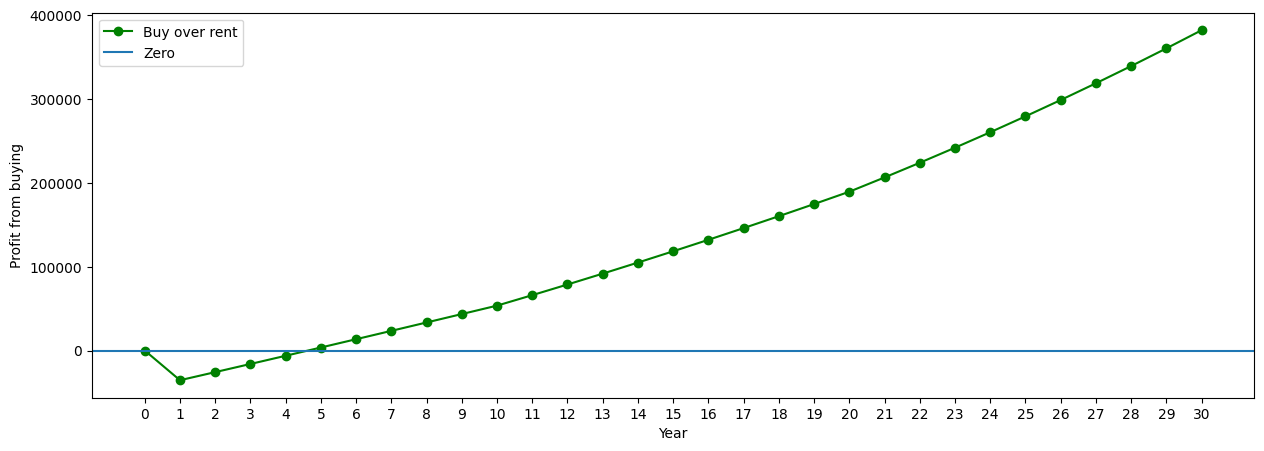

In [8]:

plot_buy_vs_rent(field="estimated_total_capital")

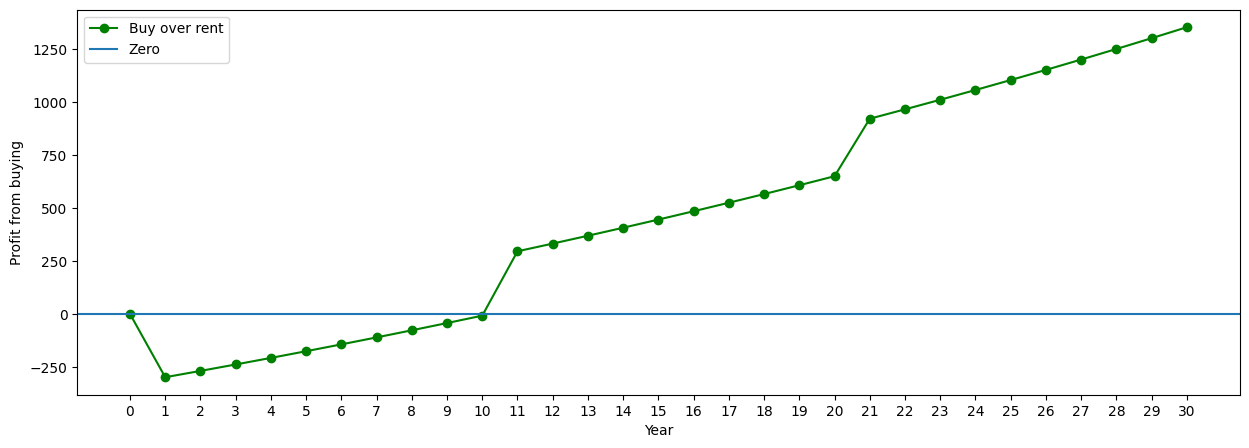

In [9]:

plot_buy_vs_rent(field="monthly_leftover")

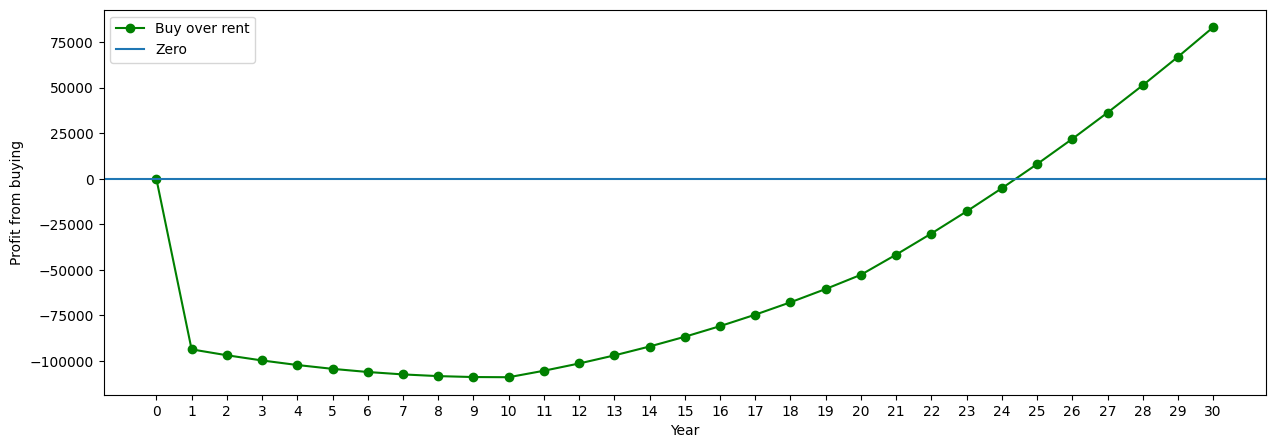

In [10]:

plot_buy_vs_rent(field="invested_capital")